In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
modelo_nuevo = pd.read_excel('modelo_nuevo.xlsx', sheet_name='Resultados_POC')

modelo_actual = pd.read_excel('modelo_actual.xlsx', sheet_name='Base_Original')


In [ ]:
modelo_nuevo.shape, modelo_actual.shape

((99, 15), (99, 10))

In [ ]:
modelo_nuevo.head()

,id,identificador,n_operacion,monto,Fecha Otorgamiento,score1,score2,tramo_deudor,prom_venta_frec,sugerido20%,sugeridoDS,Estado,% venta,%suge,%suge.1
0,1,10000001,10000,1354815,2022-03-21,0.7,810,12+,40156876,1323247,2355120,AV,0.033738,1.023856,0.575264
1,2,10000002,10001,1071000,2022-05-11,0.7,780,12+,5147437,1594045,11471613,A,0.208065,0.671876,0.093361
2,3,10000003,10002,3894870,2022-08-05,0.7,690,12+,19938459,14953844,4270811,A,0.195345,0.260459,0.911974
3,4,10000004,10003,13057444,2022-03-10,0.7,308,12+,177543375,1754718,809515,AV,0.073545,7.441335,16.129959
4,5,10000005,10004,2040136,2022-08-18,350.0,308,12+,14108298,2116244,555190,AV,0.144605,0.964036,3.674663


In [ ]:
modelo_actual.head()

,id,identificador,n_operacion,Monto Documento,Fecha Otorgamiento,Tipo de Ingreso,ESTADO,DETALLE,SALIDA OPERACIÓN,RESULTADO MODELO
0,1,10000001,10000,1354815,2022-03-21,RECHAZADAS,RECHAZADO,BUENAS,BUENAS,0
1,2,10000002,10001,1071000,2022-05-11,RECHAZADAS,RECHAZADO,BUENAS,BUENAS,0
2,3,10000003,10002,3894870,2022-08-05,RECHAZADAS,RECHAZADO,MALAS,MALAS,1
3,4,10000004,10003,13057444,2022-03-10,RECHAZADAS,RECHAZADO,BUENAS,BUENAS,0
4,5,10000005,10004,2040136,2022-08-18,RECHAZADAS,RECHAZADO,MALAS,MALAS,1


In [ ]:
pd.crosstab(modelo_actual['DETALLE'],modelo_actual['SALIDA OPERACIÓN'])

SALIDA OPERACIÓN,BUENAS,MALAS
DETALLE,,
BUENAS,80,0
MALAS,0,19


In [ ]:
modelo_actual.loc[modelo_actual['ESTADO'] == 'APROBADO', 'ESTADO'] = 'A'
modelo_actual.loc[modelo_actual['ESTADO'] == 'RECHAZADO', 'ESTADO'] = 'R'
modelo_actual.loc[modelo_actual['ESTADO'] == 'SUJETO A VERIFICACION', 'ESTADO'] = 'AV'

modelo_actual.loc[modelo_actual['SALIDA OPERACIÓN'] == 'BUENAS','SALIDA OPERACIÓN'] = '1'
modelo_actual.loc[modelo_actual['SALIDA OPERACIÓN'] == 'MALAS','SALIDA OPERACIÓN'] = '0'
modelo_actual['SALIDA OPERACIÓN'] = modelo_actual['SALIDA OPERACIÓN'].astype(int)

Cruzamos

In [ ]:
modelo_nuevo.columns

Index(['id', 'identificador', 'n_operacion', 'monto', 'Fecha Otorgamiento',
       'score1', 'score2', 'tramo_deudor', 'prom_venta_frec', 'sugerido20%',
       'sugeridoDS', 'Estado', '% venta', '%suge', '%suge.1'],
      dtype='object')

In [ ]:
modelo_nuevo.rename(columns = {'Estado': 'ESTADO_NUEVO'}, inplace=True)
modelo_actual.rename(columns = {'n_operacion':'n_operacion', 'Monto Documento':'monto','ESTADO':'ESTADO','SALIDA OPERACIÓN':'ESTADO_FINAL'}, inplace=True)

In [ ]:
modelo_nuevo.columns

Index(['id', 'identificador', 'n_operacion', 'monto', 'Fecha Otorgamiento',
       'score1', 'score2', 'tramo_deudor', 'prom_venta_frec', 'sugerido20%',
       'sugeridoDS', 'ESTADO_NUEVO', '% venta', '%suge', '%suge.1'],
      dtype='object')

In [ ]:
modelo_nuevo[['identificador','n_operacion', 'monto', 'Fecha Otorgamiento','ESTADO_NUEVO']]

,identificador,n_operacion,monto,Fecha Otorgamiento,ESTADO_NUEVO
0,10000001,10000,1354815,2022-03-21,AV
1,10000002,10001,1071000,2022-05-11,A
2,10000003,10002,3894870,2022-08-05,A
3,10000004,10003,13057444,2022-03-10,AV
4,10000005,10004,2040136,2022-08-18,AV
...,...,...,...,...,...
94,10000095,10094,22475887,2022-08-17,R
95,10000096,10095,34497624,2022-07-14,AV
96,10000097,10096,1198330,2022-07-08,A
97,10000098,10097,20575406,2022-06-24,AV


In [ ]:
estados = modelo_nuevo[['identificador','n_operacion', 'monto', 'Fecha Otorgamiento','ESTADO_NUEVO']].\
merge(modelo_actual[['identificador','n_operacion', 'monto', 'Fecha Otorgamiento','ESTADO','ESTADO_FINAL']], how='left',
     on = ['identificador','n_operacion', 'monto', 'Fecha Otorgamiento'])

In [ ]:
estados.isnull().sum()

,0
identificador,0
n_operacion,0
monto,0
Fecha Otorgamiento,0
ESTADO_NUEVO,0
ESTADO,0
ESTADO_FINAL,0


In [ ]:
pd.crosstab(estados['ESTADO_NUEVO'],estados['ESTADO'])


ESTADO,R
ESTADO_NUEVO,
A,59
AV,29
R,11


In [ ]:
estados[['identificador','n_operacion', 'monto','ESTADO_NUEVO','ESTADO','ESTADO_FINAL']].to_excel('output.xlsx', index=False)


In [ ]:
pd.crosstab(estados['ESTADO_NUEVO'],estados['ESTADO_FINAL'])


ESTADO_FINAL,0,1
ESTADO_NUEVO,,
A,10,49
AV,7,22
R,2,9


In [ ]:
df = pd.read_excel('output.xlsx', engine='openpyxl')
df.head()

,identificador,n_operacion,monto,ESTADO_NUEVO,ESTADO,ESTADO_FINAL
0,10000001,10000,1354815,AV,R,1
1,10000002,10001,1071000,A,R,1
2,10000003,10002,3894870,A,R,0
3,10000004,10003,13057444,AV,R,1
4,10000005,10004,2040136,AV,R,0


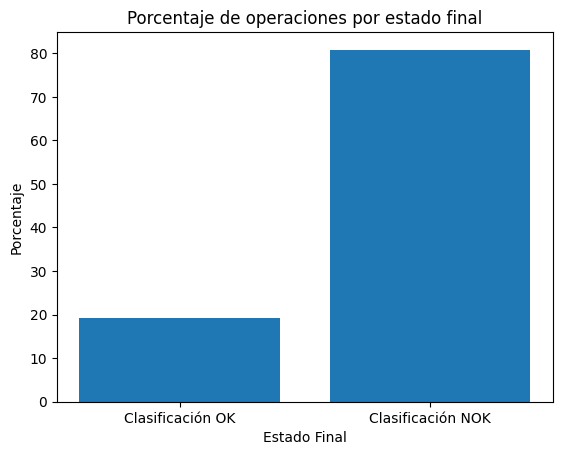

In [ ]:
# Contar las ocurrencias de cada estado final y calcular los porcentajes
estado_final_counts = df['ESTADO_FINAL'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
plt.bar(estado_final_counts.index, estado_final_counts.values)
plt.xlabel('Estado Final')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de operaciones por estado final')
plt.xticks(estado_final_counts.index, ['Clasificación NOK', 'Clasificación OK'])
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Definir un modelo simple: todos los casos como 1
y_true = df['ESTADO_FINAL']  # Valores reales
y_pred = [1] * len(y_true)  # Predicciones (todos 1)

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8080808080808081
Precision: 0.8080808080808081
Recall: 1.0
